In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 

In [2]:
dir =  os.getcwd()
FILE = dir [:-21] + "SQL/SQL_output.csv" 

In [3]:
df = pd.read_csv(FILE)
df if df.isna().sum(axis=1).any() else print("No missing values") 


No missing values


In [4]:
df

,quantity,date,time,size,pizza_type_id,price,category,ingredients
0,1,2015-01-03,14:22:10,M,hawaiian,13.25,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,1,2015-01-03,14:32:51,XL,the_greek,25.50,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
2,1,2015-01-03,14:40:42,S,mediterraneo,12.00,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie..."
3,1,2015-01-03,14:48:45,M,spinach_fet,16.00,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
4,1,2015-01-03,14:49:58,M,pepperoni,12.50,Classic,"Mozzarella Cheese, Pepperoni"
...,...,...,...,...,...,...,...,...
48615,1,2015-12-31,14:40:24,L,southw_ckn,20.75,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
48616,1,2015-12-31,14:40:24,M,southw_ckn,16.75,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
48617,1,2015-12-31,14:40:24,S,spicy_ital,12.50,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ..."
48618,1,2015-12-31,14:43:46,L,napolitana,20.50,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."


In [5]:
df

,quantity,date,time,size,pizza_type_id,price,category,ingredients
0,1,2015-01-03,14:22:10,M,hawaiian,13.25,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,1,2015-01-03,14:32:51,XL,the_greek,25.50,Classic,"Kalamata Olives, Feta Cheese, Tomatoes, Garlic..."
2,1,2015-01-03,14:40:42,S,mediterraneo,12.00,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie..."
3,1,2015-01-03,14:48:45,M,spinach_fet,16.00,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G..."
4,1,2015-01-03,14:49:58,M,pepperoni,12.50,Classic,"Mozzarella Cheese, Pepperoni"
...,...,...,...,...,...,...,...,...
48615,1,2015-12-31,14:40:24,L,southw_ckn,20.75,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
48616,1,2015-12-31,14:40:24,M,southw_ckn,16.75,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
48617,1,2015-12-31,14:40:24,S,spicy_ital,12.50,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ..."
48618,1,2015-12-31,14:43:46,L,napolitana,20.50,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,..."


In [6]:
df.rename(columns={'pizza_type_id': 'pizza_flavor'}, inplace=True) # I think this name is more appropriate

In [7]:
# Splitting the date into month and days
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.day_name()
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['hour'] = pd.to_datetime(df['time']).dt.hour


/var/folders/8n/frf4cdjd6k134p3nvgp4kf6c0000gn/T/ipykernel_8293/1059919701.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['time']).dt.hour


In [8]:

df['order_id'] = df['month'].apply(lambda x: str(x).zfill(2)) + df['day'].apply(lambda x: str(x).zfill(2)) + df['time']

# Create 'multiple_orders' column, 1 if the order_id is duplicated, 0 if not
df['multiple_orders'] = df.duplicated('order_id').astype(int)

# Fixing typing errors in 'ingredients' column

df['ingredients'] = df['ingredients'].str.replace(', ', ',') # one space
df['ingredients'] = df['ingredients'].str.replace(',  ', ',') # two spaces after comma

# Perform one-hot encoding on the 'ingredients' column
ingredients_dummies = df['ingredients'].str.get_dummies(',')

# Add the new columns to the original DataFrame
df = pd.concat([df, ingredients_dummies], axis=1)

df = df.drop('ingredients', axis=1)


In [9]:
pd.set_option('display.max_columns', None)
# So i can see all columns to make sure it worked

Sunday


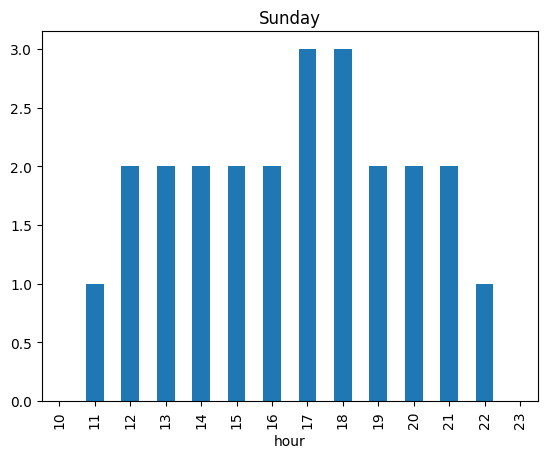

Monday


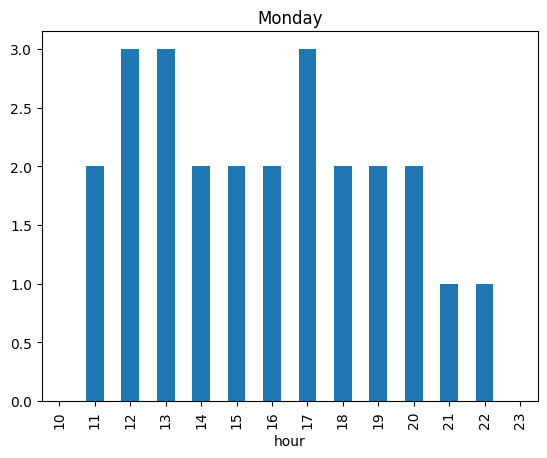

Tuesday


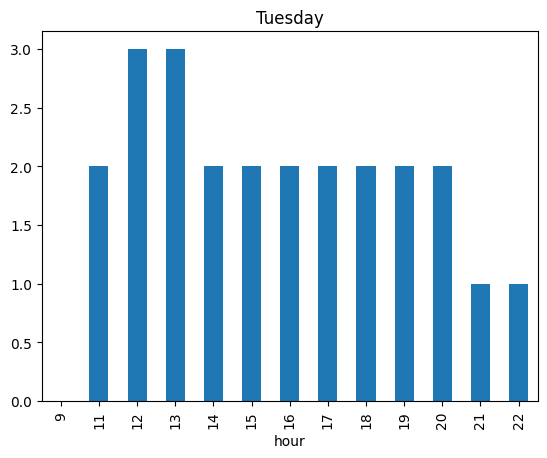

Wednesday


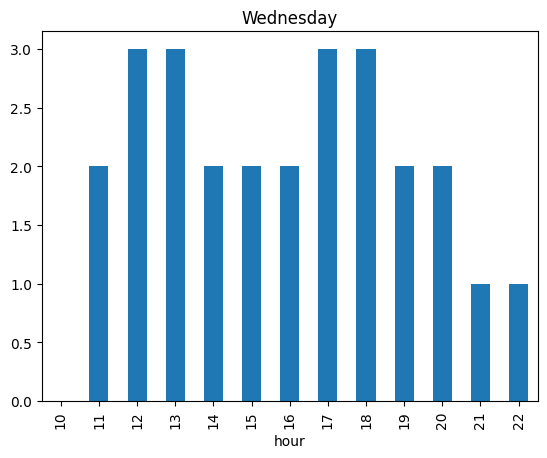

Thursday


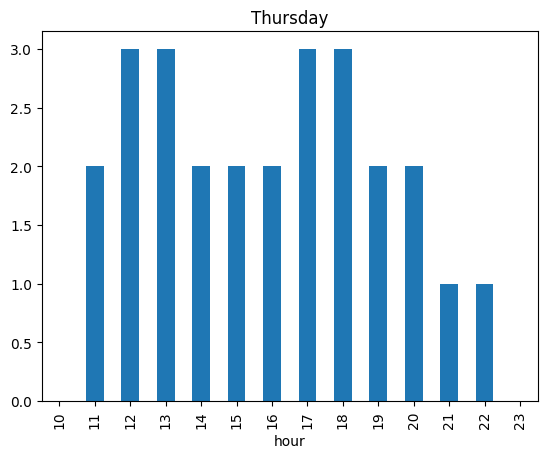

Friday


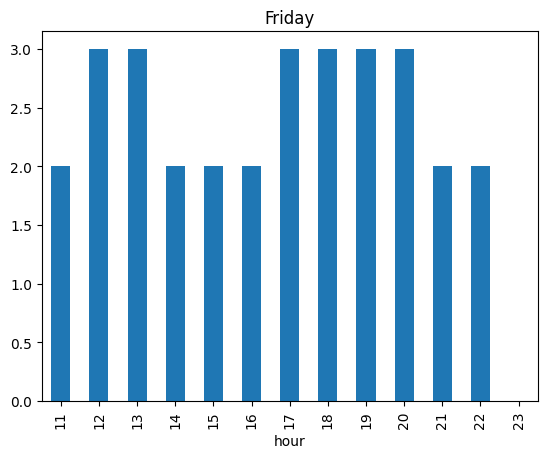

Saturday


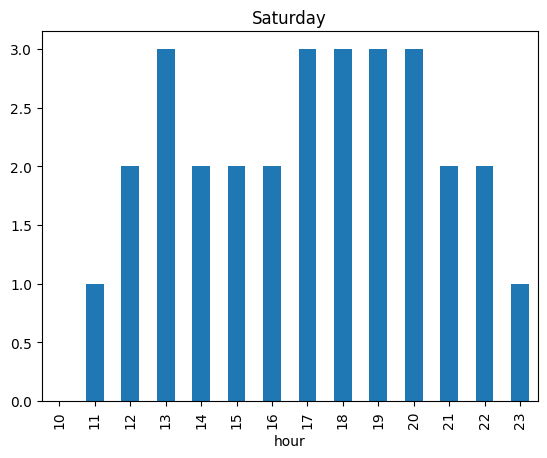

In [18]:
hourly_sum_quantity = df.groupby(['day_of_week', 'hour'])['quantity'].sum()

def set_employee_count(value):
    if value > 700:
        return 3
    elif value > 300:
        return 2
    elif value > 30:
        return 1
    else:
        return 0
    
def default_employees(value):
    return 2
    
    
hourly_sum_quantity = hourly_sum_quantity.apply(set_employee_count)
for day in day_order:
    print(day)
    hourly_sum_quantity[day].plot(kind='bar')
    plt.title(day)
    plt.show()

In [ ]:

def scale_quantity(quantity):
    if quantity > 700:
        return 3
    elif quantity > 300:
        return 2
    elif quantity > 30:
        return 1
    else:
        return 0

hourly_sum_quantity['employee_count'] = hourly_sum_quantity.apply(scale_quantity)

## Start of analysis

In [16]:
unique_flavors_per_category = df.groupby('category')['pizza_flavor'].nunique()
unique_flavors_per_category 

# distribution of flavors per category, veggie and supreme has the most variety

# Case 1: Higher Variety of pizzas can lead to higher sales
# but this may not be the case, as veggie and supreme 
# has the highest variety but not the highest sales

#   - this may be due to the fact that veggie and supreme are more expensive
#   - or just less popular

# Check if price for supreme and veggie is higher than classic

# if not, then the pizza's not as good and needs less variety

category
Chicken    6
Classic    8
Supreme    9
Veggie     9
Name: pizza_flavor, dtype: int64

In [17]:
df.groupby(df['category'])['quantity'].count() / df['quantity'].count() 
# percentage of each category in the total sales, seems balanced but classic is the most popular

category
Chicken    0.222439
Classic    0.299856
Supreme    0.242225
Veggie     0.235479
Name: quantity, dtype: float64

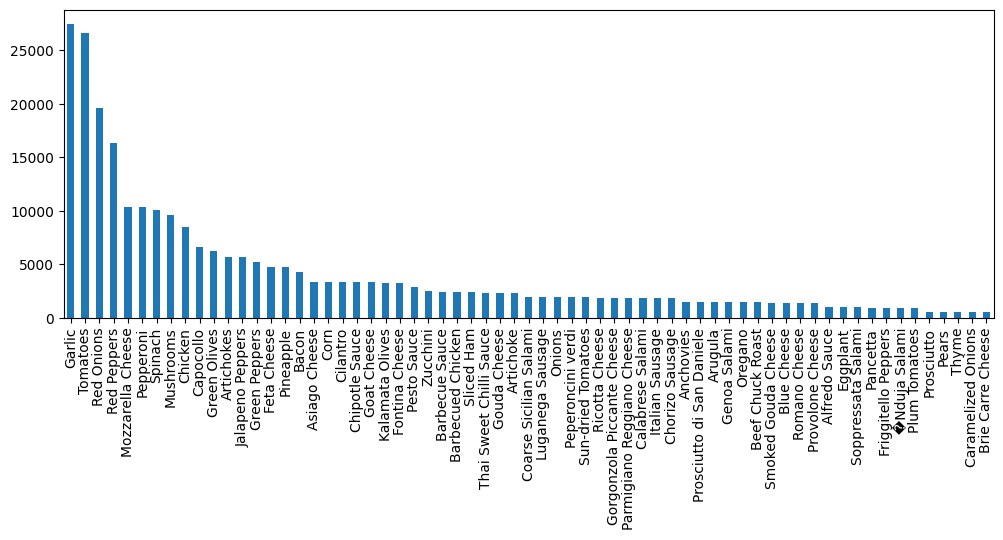

In [20]:
ing_list_ordered = ingredients.sum().sort_values(ascending=False)
ingred_plot = ing_list_ordered.plot(kind='bar', figsize=(12, 4))